<a href="https://colab.research.google.com/github/SolankiRahul3307/SolankiRahul3307/blob/main/Customer_Lifetime_Value_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Problem Statement


## ***Customer Lifetime Value represents a customer’s value to a company over a period of time. It’s a competitive market for insurance companies in 2019, and insurance premium isn’t the only determining factor in a customer’s decisions. CLV is a customer-centric metric, and a powerful base to build upon to retain valuable customers, increase revenue from less valuable customers, and improve the customer experience overall.***

## ***Auto Insurance company is facing issues in retaining its customers and wants to advertise promotional offers for its loyal customers. They are considering CLV as a parameter to classify loyal customers.***

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # Add more colors if needed

# Set the color palette
sns.set_palette(colors)


In [4]:
df=pd.read_csv("AutoInsurance.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
print("The number of rows:",df.shape[0])
print("The number of columns:",df.shape[1])

The number of rows: 9134
The number of columns: 24


In [6]:
df.rename(columns={'Customer Lifetime Value':'CLV'},inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   CLV                            9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [8]:
numerical_cols = df.select_dtypes(include=["int64","float64"])

In [9]:
numerical_cols.columns

Index(['CLV', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Total Claim Amount'],
      dtype='object')

In [10]:
numerical_cols = numerical_cols.drop(["Number of Policies","Number of Open Complaints"],axis=1)

# *Summary Statistics of Numerical features*

In [11]:
numerical_cols.describe()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,2893.239678


In [12]:
df.isnull().sum()

Customer                         0
State                            0
CLV                              0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

# ***EDA***

# ***Numerical Features***


# ***CLV - Target variable analysis***

<ipython-input-13-639c63b2c30f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CLV"])


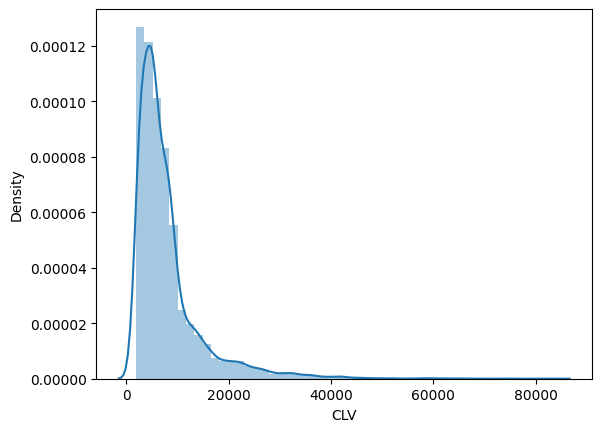

In [13]:
sns.distplot(df["CLV"])
# plt.savefig("CLV.png")
plt.show()

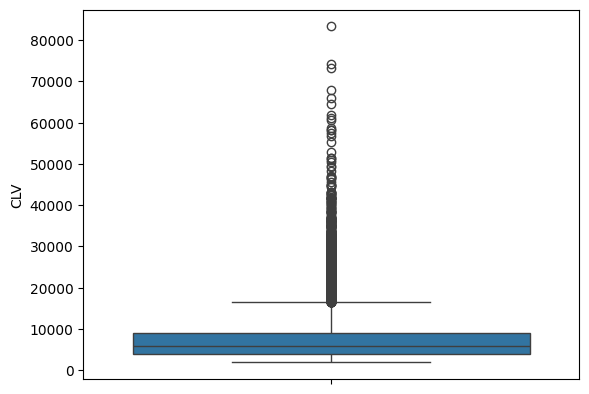

In [14]:
sns.boxplot(df["CLV"])
plt.show()

In [15]:
df["CLV"].skew()

3.0322802599299847

*From the distribution and box plot we can infer that CLV is highly right skewed. There are lot of outliers in our dependent variable but we cant treat them directly because they are influential points.*

# ***Income***


# ***Univariate Analysis***

<ipython-input-16-ffd47b6b5651>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Income"])


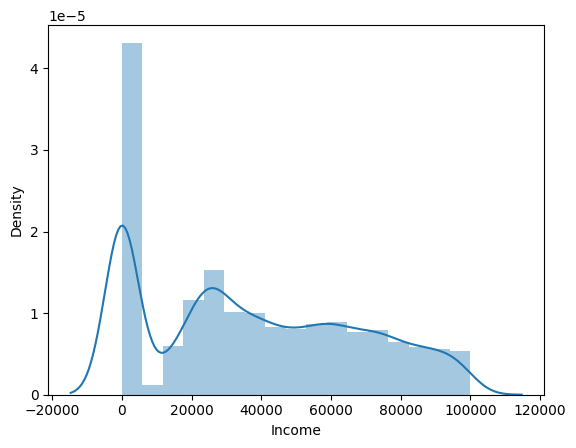

In [16]:
sns.distplot(df["Income"])
plt.show()

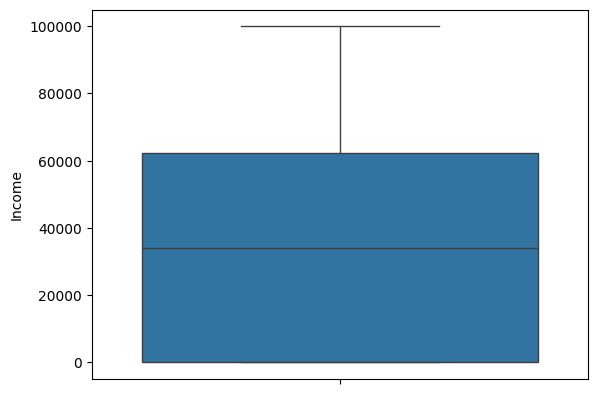

In [17]:
sns.boxplot(df["Income"])
plt.show()

***Bivariate Analysis***

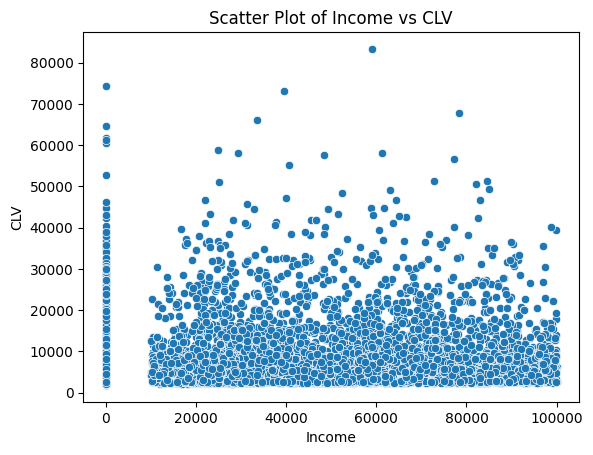

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df["Income"], y=df["CLV"])
plt.xlabel("Income")
plt.ylabel("CLV")
plt.title("Scatter Plot of Income vs CLV")
plt.show()


There is no linear relationship between income and CLV



# ***Monthly Premium Auto***

<ipython-input-19-169af1d9eadf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Monthly Premium Auto"],color='c')


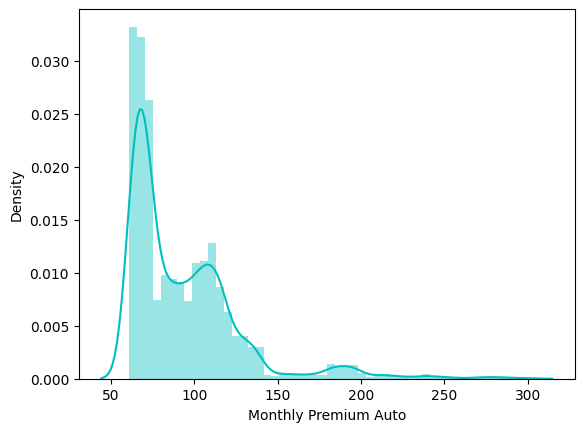

In [19]:
sns.distplot(df["Monthly Premium Auto"],color='c')
plt.show()

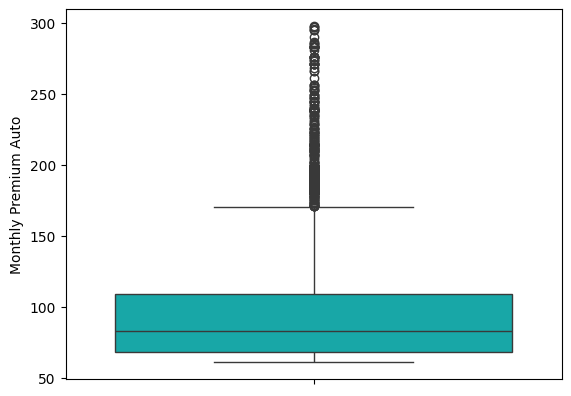

In [20]:
sns.boxplot(df["Monthly Premium Auto"],color='c')
plt.show()

***Bivariate Analysis***

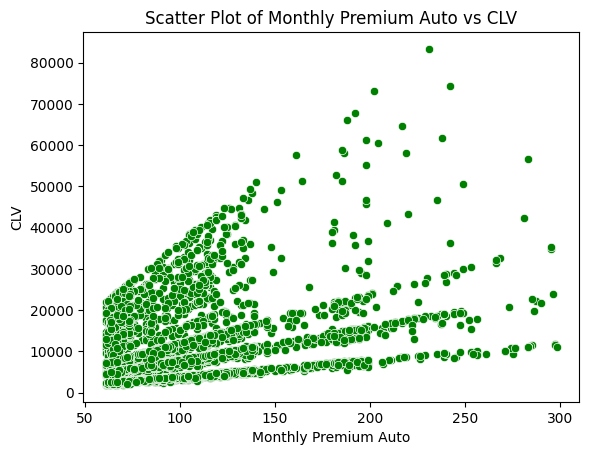

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df["Monthly Premium Auto"], y=df["CLV"], color='g')
plt.xlabel("Monthly Premium Auto")
plt.ylabel("CLV")
plt.title("Scatter Plot of Monthly Premium Auto vs CLV")
plt.show()


There is linear relationship between income and CLV



# ***Months Since Last Claim***

<ipython-input-22-b27c949b6b9f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Months Since Last Claim'])


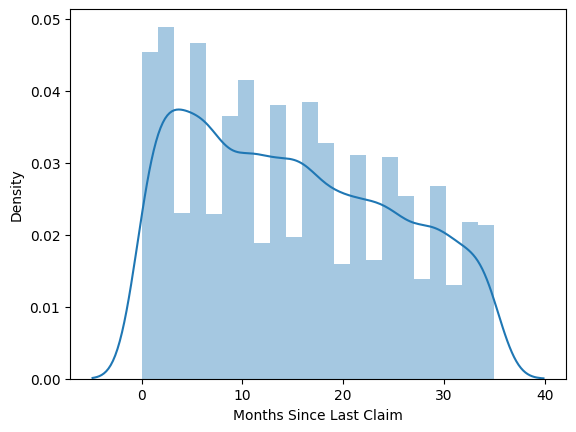

In [22]:
sns.distplot(df['Months Since Last Claim'])
plt.show()

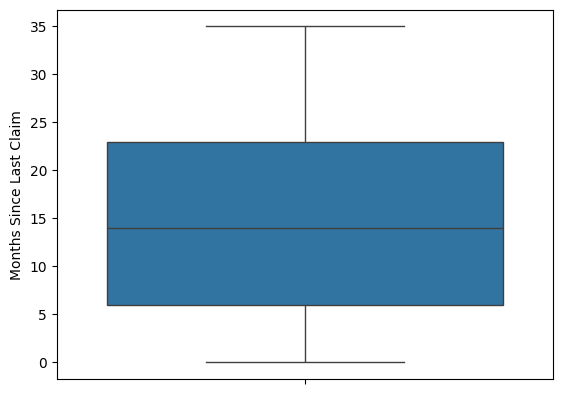

In [23]:
sns.boxplot(df["Months Since Last Claim"])
plt.show()

### ***Bivariate Analysis***

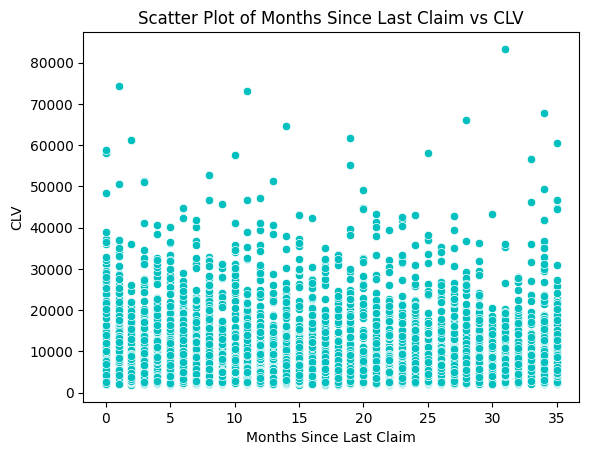

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df["Months Since Last Claim"], y=df["CLV"], color='c')
plt.xlabel("Months Since Last Claim")
plt.ylabel("CLV")
plt.title("Scatter Plot of Months Since Last Claim vs CLV")
plt.show()


There is no linear relationship

# ***Months Since Policy Inception***

<ipython-input-25-4095dae5d782>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Months Since Policy Inception'])


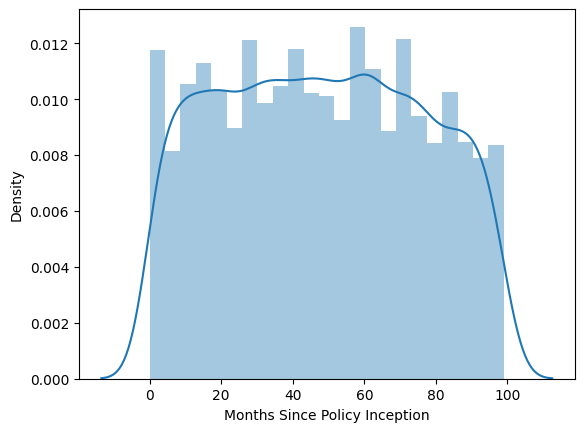

In [25]:
sns.distplot(df['Months Since Policy Inception'])
plt.show()

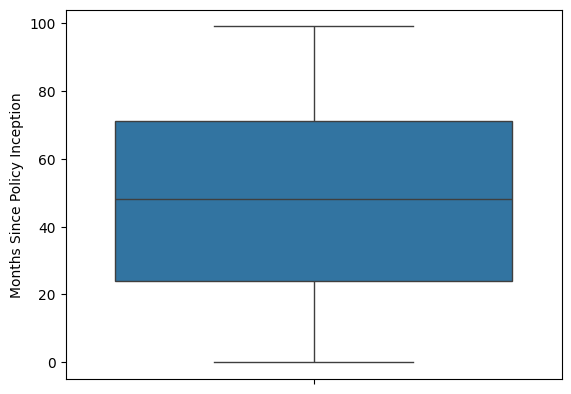

In [26]:
sns.boxplot(df["Months Since Policy Inception"])
plt.show()

# ***Total claim amount***

<ipython-input-27-e78db172f4f4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total Claim Amount'])


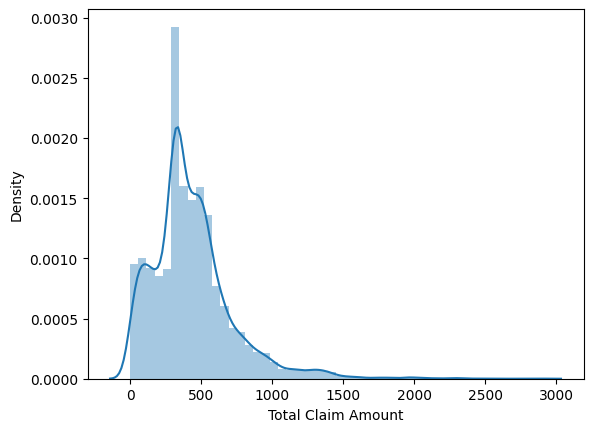

In [27]:
sns.distplot(df['Total Claim Amount'])
plt.show()

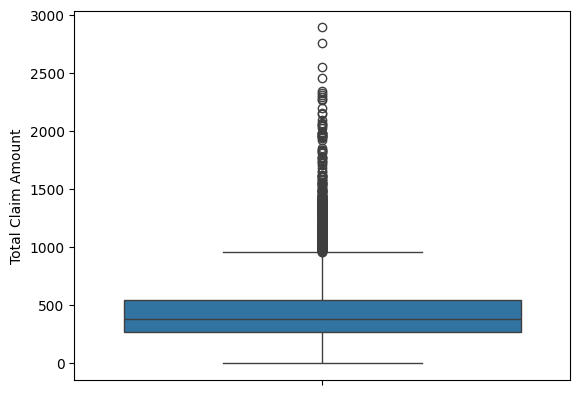

In [28]:
sns.boxplot(df["Total Claim Amount"])
plt.show()

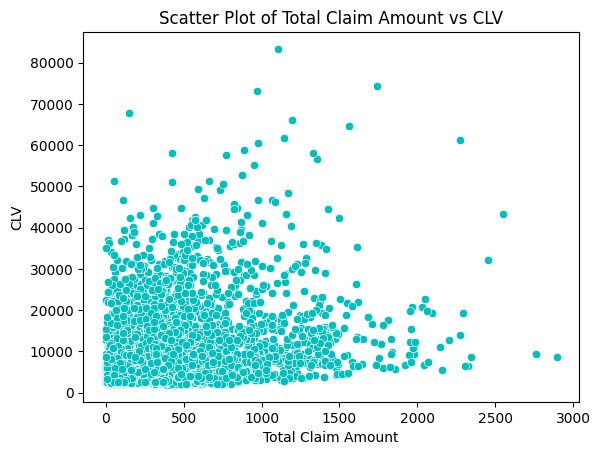

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df["Total Claim Amount"], y=df["CLV"], color='c')
plt.xlabel("Total Claim Amount")
plt.ylabel("CLV")
plt.title("Scatter Plot of Total Claim Amount vs CLV")
plt.show()


There is a linear relationship between CLV and Total Claim Amount

The monthly premium auto and income feature has multiple peak's so to remove those peaks we can apply any of the power transformation (SQUARE / CUBE)

<ipython-input-30-577edc81b77a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.square(df["Monthly Premium Auto"]),color='r')


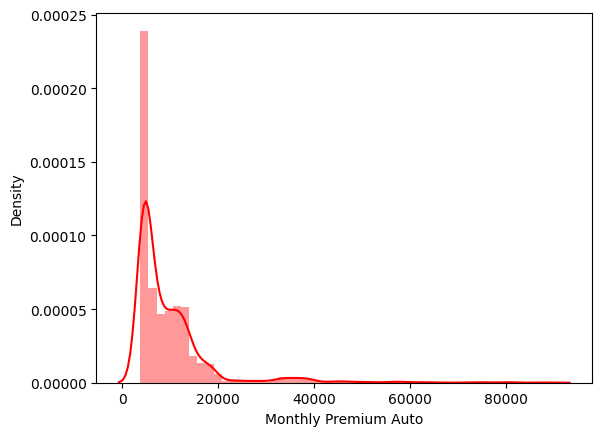

In [30]:
sns.distplot(np.square(df["Monthly Premium Auto"]),color='r')
plt.show()

<ipython-input-31-1c5a47d23c0b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.square(df["Income"]),color='r')


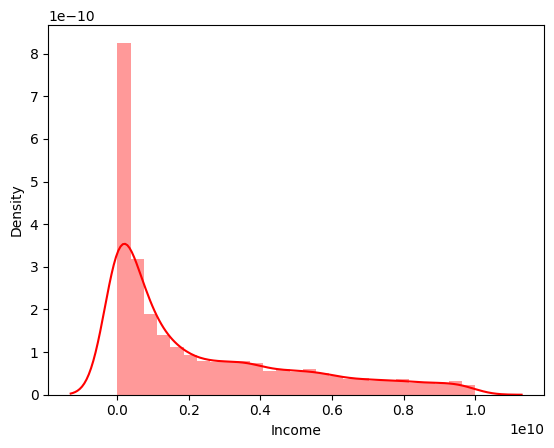

In [31]:
sns.distplot(np.square(df["Income"]),color='r')
plt.show()

But as we can see that after the square transformation the data is getting heavily skewed, so we stick with the actual distribution again. We will just stick with the actual distribution of the feature in our model building.

# ***Categorical variables***

In [32]:
cat_cols = df.select_dtypes(include="object")
no_col = df[["Number of Open Complaints","Number of Policies"]]
cat_cols = pd.concat([cat_cols,no_col],axis=1)
cat_cols.head()

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [33]:
cat_cols.drop("Effective To Date",axis=1,inplace=True)

In [34]:
cat_cols.columns


Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [35]:
for i in cat_cols:
    print("Unique values in",str(i),"is",df[i].nunique())
    print(df[i].value_counts())
    print("-----------------------------------------")

Unique values in Customer is 9134
BU79786    1
PU81096    1
CO75086    1
WW52683    1
XO38850    1
          ..
HS14476    1
YL91587    1
CT18212    1
EW35231    1
Y167826    1
Name: Customer, Length: 9134, dtype: int64
-----------------------------------------
Unique values in State is 5
California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64
-----------------------------------------
Unique values in Response is 2
No     7826
Yes    1308
Name: Response, dtype: int64
-----------------------------------------
Unique values in Coverage is 3
Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64
-----------------------------------------
Unique values in Education is 5
Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64
-----------------------------------------
Unique values in Em

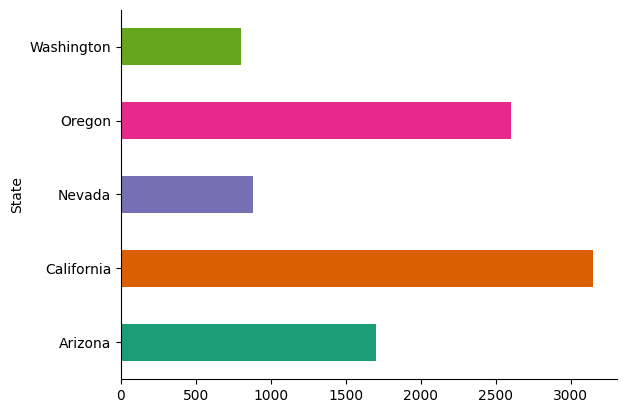

In [36]:
# @title State

from matplotlib import pyplot as plt
import seaborn as sns
cat_cols.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Most number of people are residing in california



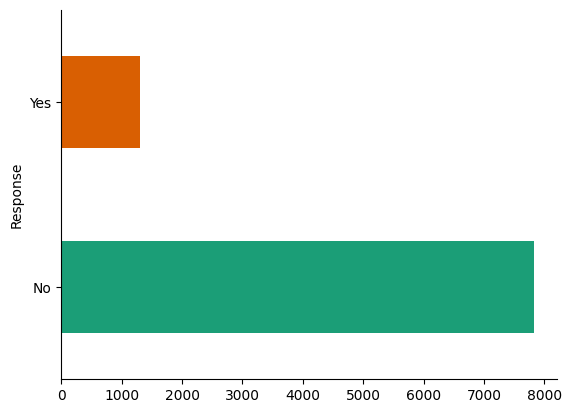

In [37]:
# @title Response

from matplotlib import pyplot as plt
import seaborn as sns
cat_cols.groupby('Response').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Its seems that less than 1400 customers have responded to the marketing calls



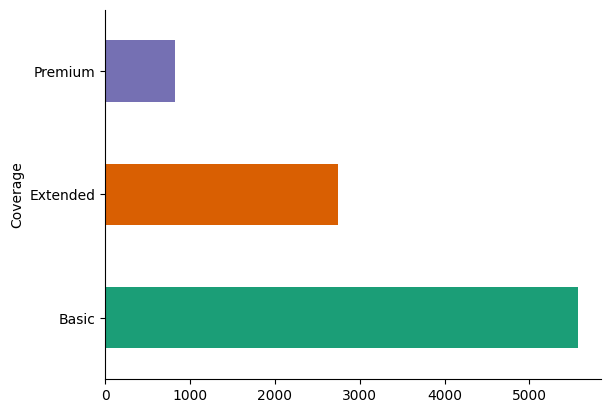

In [38]:
# @title Coverage

from matplotlib import pyplot as plt
import seaborn as sns
cat_cols.groupby('Coverage').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

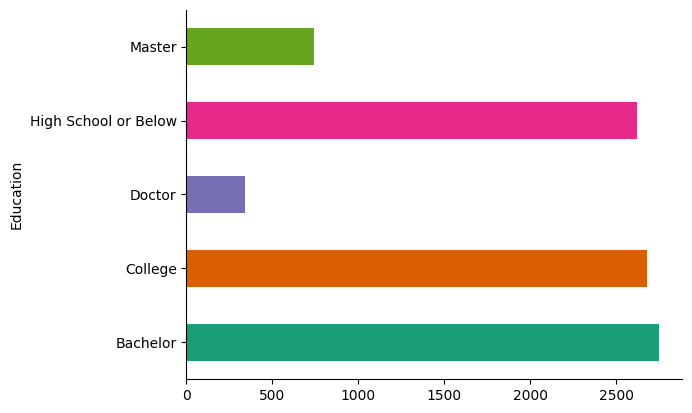

In [39]:
# @title Education

from matplotlib import pyplot as plt
import seaborn as sns
cat_cols.groupby('Education').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Most of the customers have either a bachelor or college degree



# ***EmploymentStatus***

<ipython-input-40-84642e0cf6c0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="EmploymentStatus", palette=colors)
<ipython-input-40-84642e0cf6c0>:8: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(data=df, x="EmploymentStatus", palette=colors)


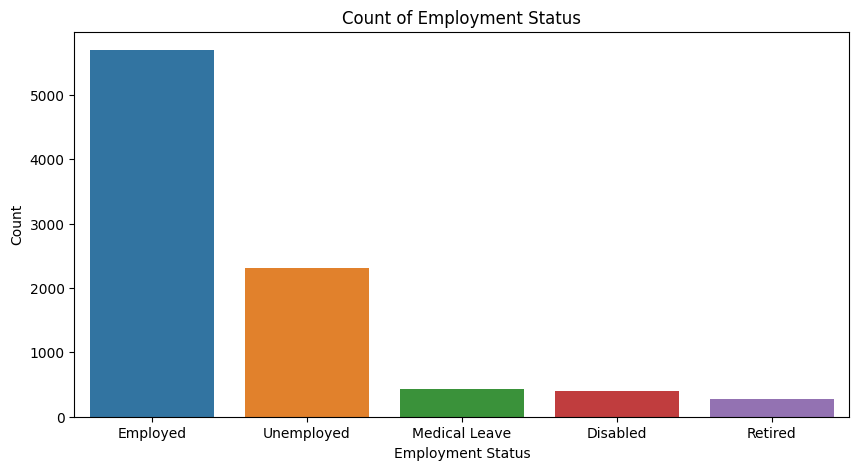

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette with different colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="EmploymentStatus", palette=colors)
plt.title("Count of Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("Count")
plt.show()



In [41]:
df["EmploymentStatus"].value_counts(normalize=True)*100

Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64

Around 62.38% of the customers are employed



<ipython-input-42-8692da7e218b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['EmploymentStatus'], y=df['CLV'], palette=colors)
<ipython-input-42-8692da7e218b>:8: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.boxplot(x=df['EmploymentStatus'], y=df['CLV'], palette=colors)


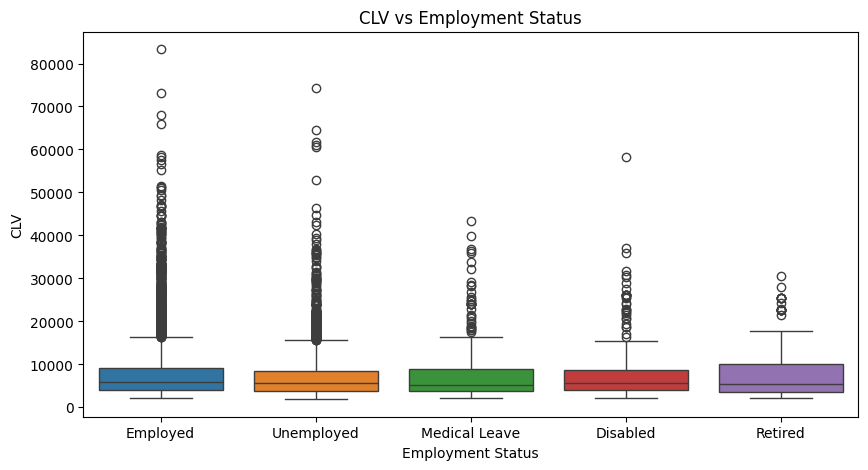

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette with different colors
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['EmploymentStatus'], y=df['CLV'], palette=colors)
plt.title("CLV vs Employment Status")
plt.xlabel("Employment Status")
plt.ylabel("CLV")
plt.show()


# ***Gender***

<ipython-input-43-bd655f7a4e3f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Gender"], palette=colors)
<ipython-input-43-bd655f7a4e3f>:7: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.countplot(x=df["Gender"], palette=colors)


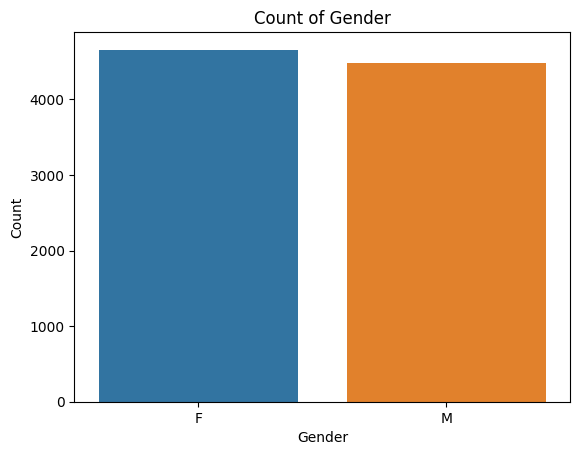

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors for each category
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # Add more colors if needed

sns.countplot(x=df["Gender"], palette=colors)
plt.title("Count of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


# ***Location Code***

<ipython-input-44-c704d5cc84d7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Location Code"], palette=colors)
<ipython-input-44-c704d5cc84d7>:8: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(x=df["Location Code"], palette=colors)


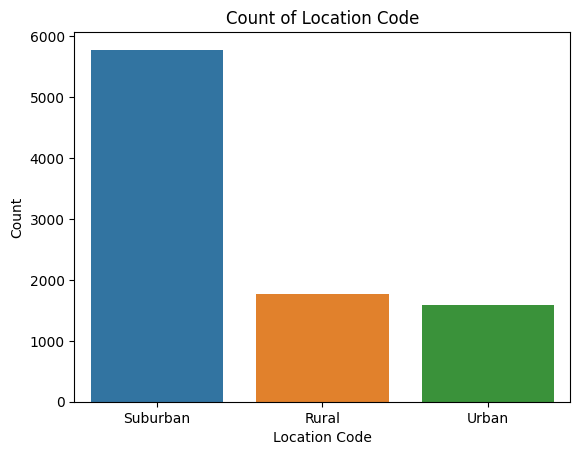

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # Add more colors if needed

# Create the count plot and specify colors
sns.countplot(x=df["Location Code"], palette=colors)

# Customize plot labels
plt.title("Count of Location Code")
plt.xlabel("Location Code")
plt.ylabel("Count")

# Save the plot and display
plt.savefig("location.png")
plt.show()


# ***Marital Status***

<ipython-input-45-c821327f1d76>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Marital Status"], palette=colors)
<ipython-input-45-c821327f1d76>:8: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(x=df["Marital Status"], palette=colors)


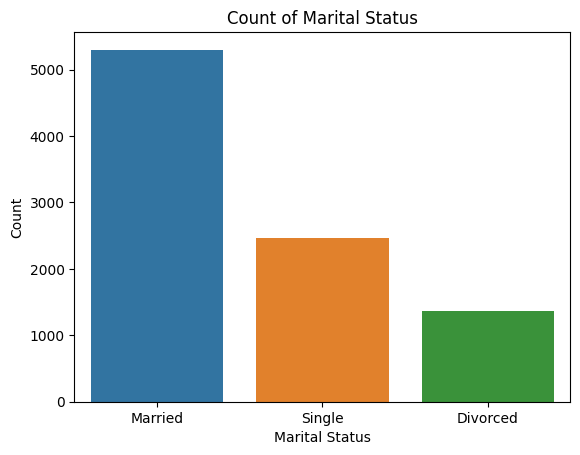

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # Add more colors if needed

# Create the count plot and specify colors
sns.countplot(x=df["Marital Status"], palette=colors)

# Customize plot labels
plt.title("Count of Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Count")

# Show the plot
plt.show()


<ipython-input-46-4144817abadf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Marital Status"], y=df["CLV"], palette=colors)
<ipython-input-46-4144817abadf>:7: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.barplot(x=df["Marital Status"], y=df["CLV"], palette=colors)


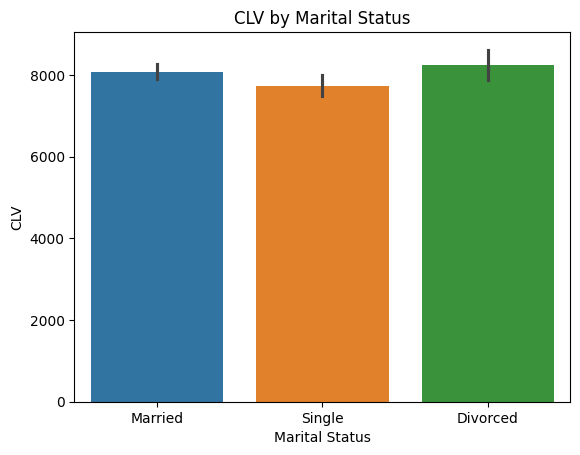

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors for each category
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # Add more colors if needed

sns.barplot(x=df["Marital Status"], y=df["CLV"], palette=colors)
plt.title("CLV by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("CLV")
plt.show()


# ***Policy Type***

<ipython-input-47-c1778fab3cad>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Policy Type"], palette=colors)
<ipython-input-47-c1778fab3cad>:8: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.countplot(x=df["Policy Type"], palette=colors)


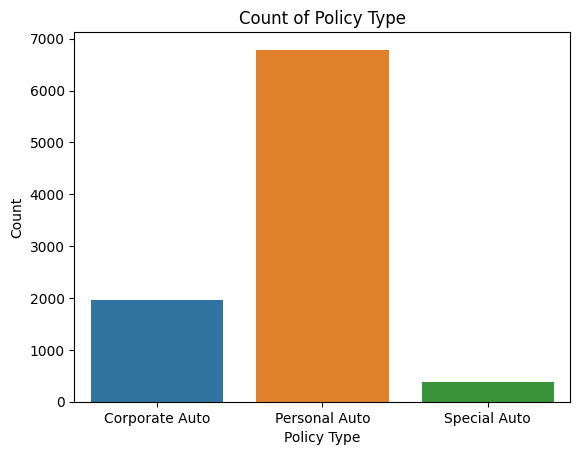

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors for each category
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]  # Add more colors if needed

# Create the count plot and specify colors
sns.countplot(x=df["Policy Type"], palette=colors)

# Customize plot labels
plt.title("Count of Policy Type")
plt.xlabel("Policy Type")
plt.ylabel("Count")

# Show the plot
plt.show()


# **Policy**

<ipython-input-48-c7aed269f536>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Policy"], palette=colors)
<ipython-input-48-c7aed269f536>:11: UserWarning: 
The palette list has fewer values (6) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=df["Policy"], palette=colors)


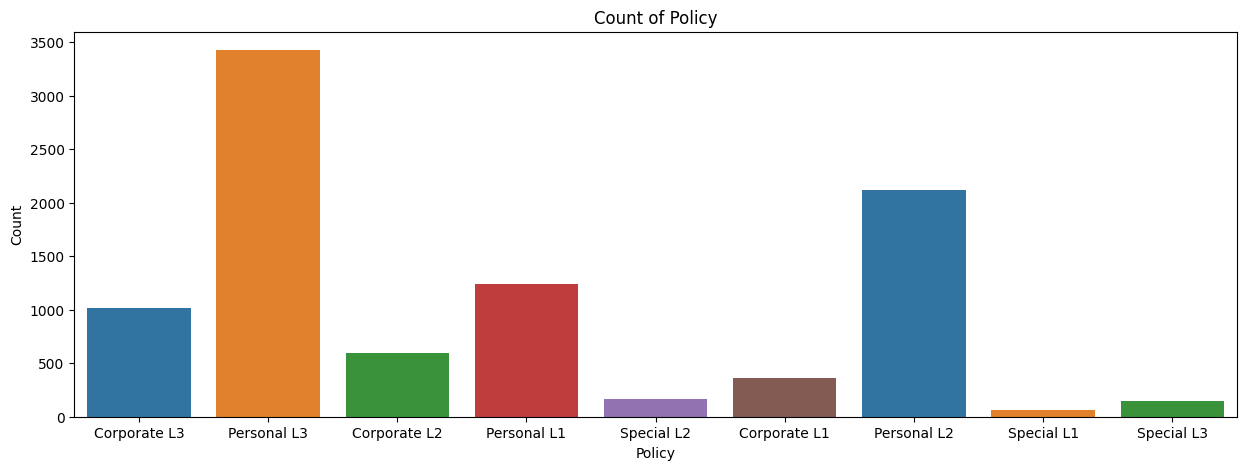

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]  # Add more colors if needed

# Set the figure size
plt.figure(figsize=(15, 5))

# Create the count plot and specify colors
sns.countplot(x=df["Policy"], palette=colors)

# Customize plot labels
plt.title("Count of Policy")
plt.xlabel("Policy")
plt.ylabel("Count")

# Show the plot
plt.show()


Personal L3 policy subcategory has the most number of customers



# **Renew Offer type**

<ipython-input-49-e6602bbd9edb>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Renew Offer Type"], palette=colors)


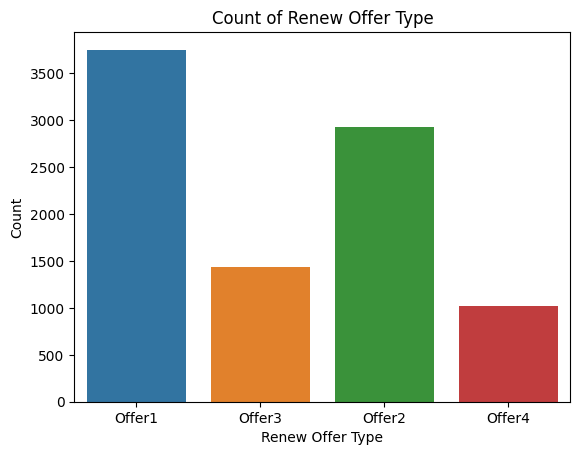

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors for each category
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Add more colors if needed

# Create the count plot and specify colors
sns.countplot(x=df["Renew Offer Type"], palette=colors)

# Customize plot labels
plt.title("Count of Renew Offer Type")
plt.xlabel("Renew Offer Type")
plt.ylabel("Count")

# Show the plot
plt.show()


# **Sales Channel**

<ipython-input-50-bd8d8254f42e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sales Channel"], palette=colors)


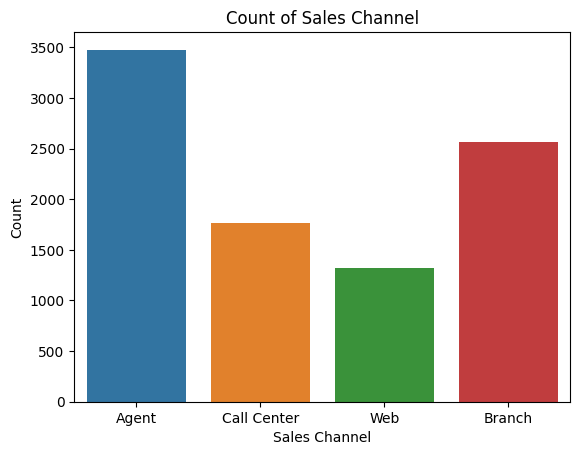

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors for each category
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Add more colors if needed

# Create the count plot and specify colors
sns.countplot(x=df["Sales Channel"], palette=colors)

# Customize plot labels
plt.title("Count of Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Count")

# Show the plot
plt.show()


# **Vehicle Class**

<ipython-input-51-069b47e9bdea>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Vehicle Class"], palette=colors)
<ipython-input-51-069b47e9bdea>:11: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.countplot(x=df["Vehicle Class"], palette=colors)


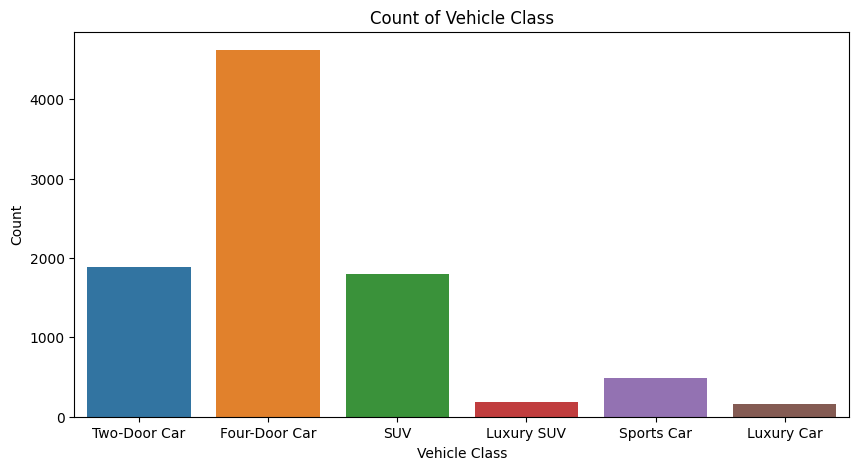

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors for each category
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]  # Add more colors if needed

# Set the figure size
plt.figure(figsize=(10, 5))

# Create the count plot and specify colors
sns.countplot(x=df["Vehicle Class"], palette=colors)

# Customize plot labels
plt.title("Count of Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Count")

# Show the plot
plt.show()


# **Vehicle Size**

<ipython-input-52-d8ce18a7923e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Vehicle Size"], palette=colors)


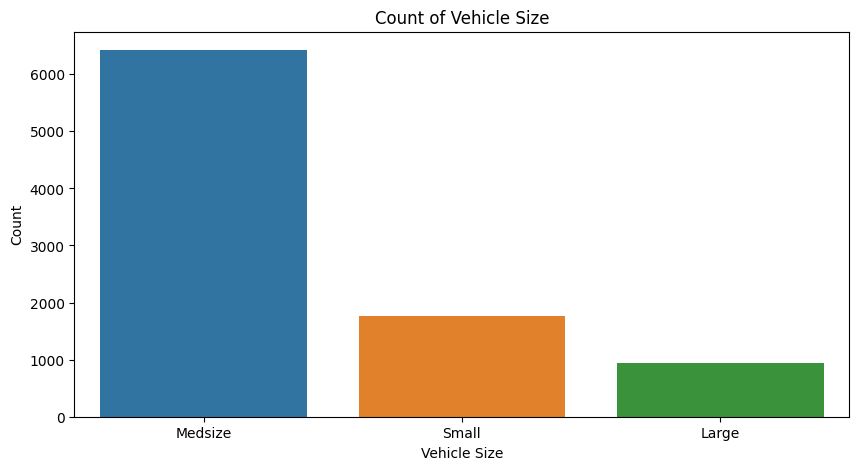

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors for each category
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Add more colors if needed

# Set the figure size
plt.figure(figsize=(10, 5))

# Create the count plot and specify colors
sns.countplot(x=df["Vehicle Size"], palette=colors)

# Customize plot labels
plt.title("Count of Vehicle Size")
plt.xlabel("Vehicle Size")
plt.ylabel("Count")

# Show the plot
plt.show()


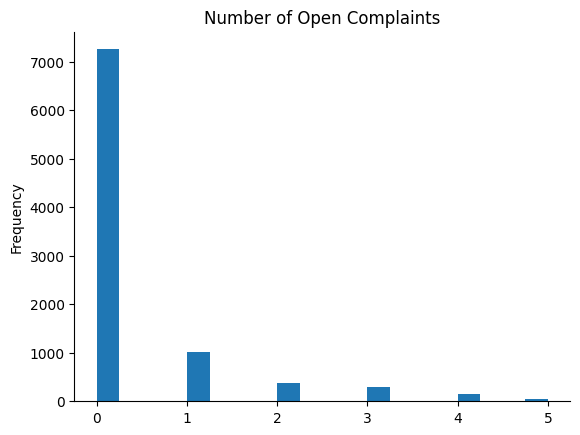

In [53]:
# @title Number of Open Complaints

from matplotlib import pyplot as plt
cat_cols['Number of Open Complaints'].plot(kind='hist', bins=20, title='Number of Open Complaints')
plt.gca().spines[['top', 'right',]].set_visible(False)

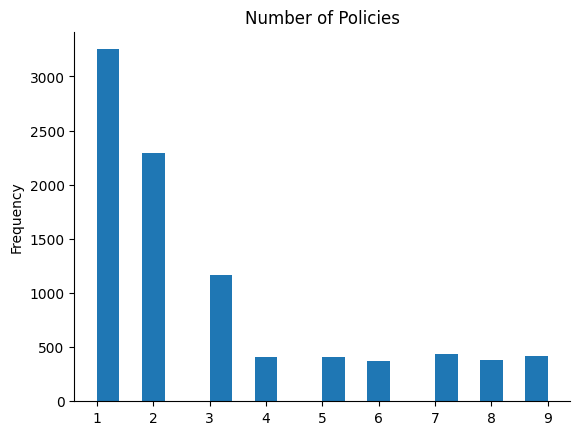

In [54]:
# @title Number of Policies

from matplotlib import pyplot as plt
cat_cols['Number of Policies'].plot(kind='hist', bins=20, title='Number of Policies')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [55]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'],infer_datetime_format=True)

In [56]:
df["Months"] = df["Effective To Date"].dt.month


In [57]:
df['Months'] = df['Months'].astype('object')


# ***Months***

<ipython-input-58-c714d7414073>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Months"], palette=colors)


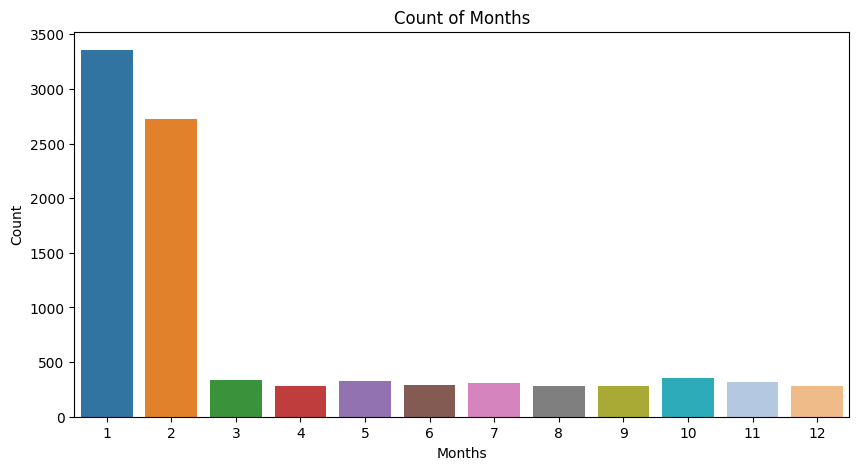

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors for each category
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", "#aec7e8", "#ffbb78"]  # Add more colors if needed

# Set the figure size
plt.figure(figsize=(10, 5))

# Create the count plot and specify colors
sns.countplot(x=df["Months"], palette=colors)

# Customize plot labels
plt.title("Count of Months")
plt.xlabel("Months")
plt.ylabel("Count")

# Show the plot
plt.show()


In [59]:
cat_cols.columns

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints',
       'Number of Policies'],
      dtype='object')

In [60]:
df.columns

Index(['Customer', 'State', 'CLV', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Months'],
      dtype='object')

# ***HeatMap***

In [61]:
heatmap = df[['CLV', 'Income', 'Monthly Premium Auto','Total Claim Amount']]

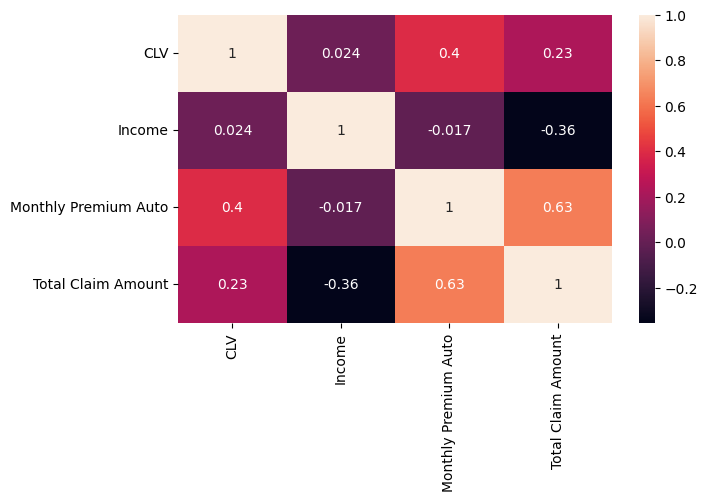

In [62]:
plt.figure(figsize=(7,4))
sns.heatmap(heatmap.corr(),annot=True)
# plt.savefig("Heatmap.png")
plt.show()

We can clearly see in the heatmap, that customer lifetime value has a better correlation with monthly premium auto and acceptable correlation with total claim amount.

# ***Statistical Significance***


*H0:The null hypothesis of the test is the data is normally distributed List item

*HA:The data is not normally distributed.

In [63]:
stats.shapiro(df['CLV'])

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7033725380897522, pvalue=0.0)

p-value less than 0.05 we reject null hypothesis the data is not normally distributed

We will proceed with non parametric tests since the dependent variable is not normally distributed

In [64]:
columns_cat = list(cat_cols.columns)
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [65]:
manwhiteneyy = []
anova = []

for i in columns_cat:
    if (df[i].nunique()>2):
        anova.append(i)
    else:
        manwhiteneyy.append(i)
print("Anova:",anova)
print("TTest:",manwhiteneyy)

Anova: ['Customer', 'State', 'Coverage', 'Education', 'EmploymentStatus', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size', 'Number of Open Complaints', 'Number of Policies']
TTest: ['Response', 'Gender']


H0, the distributions of both populations are equal The alternative hypothesis H1 is that the distributions are not equal.

In [66]:
yes=df[df['Response']=='No']['CLV']
no=df[df['Response']=='Yes']['CLV']

<ipython-input-67-1e00beccbb59>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yes)
<ipython-input-67-1e00beccbb59>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no)


<Axes: xlabel='CLV', ylabel='Density'>

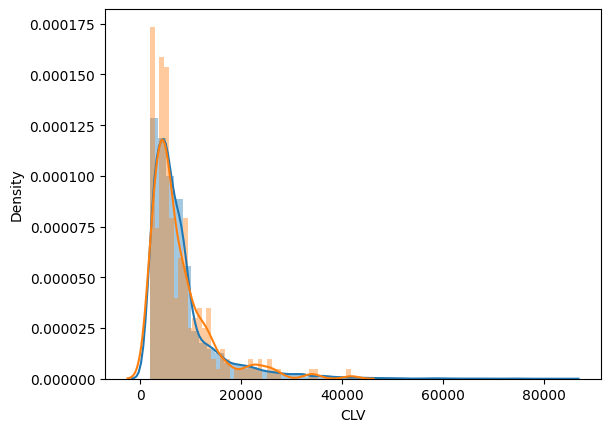

In [67]:
sns.distplot(yes)
sns.distplot(no)

If the distributions are identical, which is the null hypothesis of the Mann-Whitney U test, the mean rank will be the same



In [68]:
f = stats.mannwhitneyu(yes,no)
print(f)

MannwhitneyuResult(statistic=5175420.0, pvalue=0.5168872245291198)


p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.



In [69]:
male=df[df['Gender']=='M']['CLV']
female=df[df['Gender']=='F']['CLV']

In [70]:
b =stats.mannwhitneyu(male,female)
print(b)

MannwhitneyuResult(statistic=10337134.0, pvalue=0.48749303056449833)


p-value is greater than 0.05 we failed to reject null hypothesis i.e the mean rank will be the same for both males and females.


we test above two features with non-Paramteric unpaired ttest and we concluded that those 2 features is not significant to predict traget.



*  H0:the mean ranks of the groups are the same. List item

*  H1:the mean ranks of the groups are not the same.

In [71]:
ca=df[df['State']=='California']['CLV']
Or=df[df['State']=='Oregon']['CLV']
Ar=df[df['State']=='Arizona']['CLV']
Ne=df[df['State']=='Nevada']['CLV']
Wa=df[df['State']=='Washington']['CLV']

In [72]:
a = stats.kruskal(ca,Or,Ar,Ne,Wa)
print(a)

KruskalResult(statistic=5.072069583836472, pvalue=0.27998232358818953)


p-value > 0.05 failed to reject H0

In [73]:
stats.f_oneway(ca,Or,Ar,Ne,Wa)
print(b)

MannwhitneyuResult(statistic=10337134.0, pvalue=0.48749303056449833)


In [74]:
# df.rename(columns={'CLV':'CLV'},inplace=True)

In [75]:
Ba=df[df['Coverage']=='Basic']['CLV']
Ex=df[df['Coverage']=='Extended']['CLV']
Pr=df[df['Coverage']=='Premium']['CLV']

<ipython-input-76-52b4fdcada7b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Ba,hist=False,label='Basic')
<ipython-input-76-52b4fdcada7b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Ex,hist=False)
<ipython-input-76-52b4fdcada7b>:3: UserWarning: 

`distplot` is a deprec

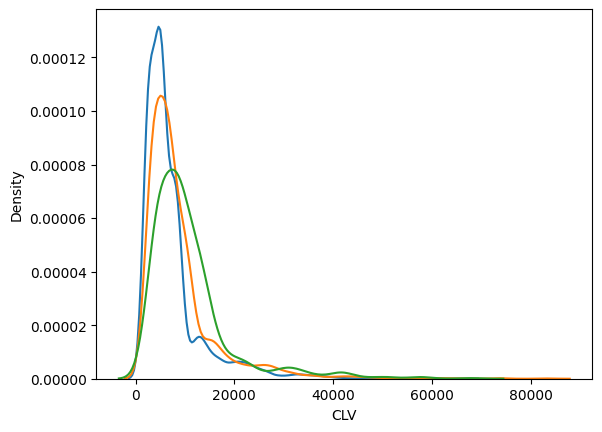

In [76]:
sns.distplot(Ba,hist=False,label='Basic')
sns.distplot(Ex,hist=False)
sns.distplot(Pr,hist=False)
plt.show()

In [77]:
c =stats.kruskal(Ba,Ex,Pr)
print(c)

KruskalResult(statistic=502.4996090762843, pvalue=7.648852917746348e-110)


p-value < 0.05 to reject H0

In [78]:
stats.f_oneway(Ba,Ex,Pr)

F_onewayResult(statistic=133.67511419504905, pvalue=6.0158970099807e-58)

In [79]:
Ba=df[df['Education']=='Bachelor']['CLV']
Co=df[df['Education']=='College']['CLV']
Hi=df[df['Education']=='High School or Below']['CLV']
Ma=df[df['Education']=='Master']['CLV']
Da=df[df['Education']=='Doctor']['CLV']

In [80]:
d= stats.kruskal(Ba,Co,Hi,Ma,Da)
print(d)

KruskalResult(statistic=12.234061758188824, pvalue=0.015693004298603028)


<ipython-input-81-c5e4e77716e5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Ba,hist=False,label='Bachelor')
<ipython-input-81-c5e4e77716e5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Co,hist=False,label='College')
<ipython-input-81-c5e4e77716e5>:4: UserWarning: 

`di

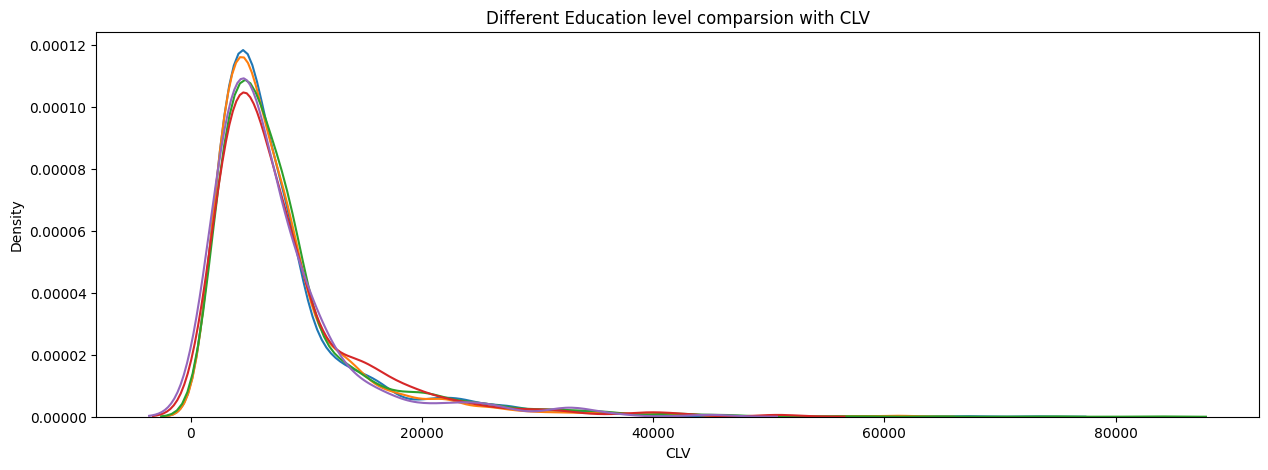

In [81]:
plt.figure(figsize=(15,5))
sns.distplot(Ba,hist=False,label='Bachelor')
sns.distplot(Co,hist=False,label='College')
sns.distplot(Hi,hist=False,label='High School or Below')
sns.distplot(Ma,hist=False,label='Master')
sns.distplot(Da,hist=False,label='Doctor')
plt.title("Different Education level comparsion with CLV")
# plt.savefig("Education.png")
plt.show()

p-value < 0.05 reject H0, Education is significant in predicting CLV

In [82]:
Ba=df[df['EmploymentStatus']=='Employed']['CLV']
Co=df[df['EmploymentStatus']=='Unemployed']['CLV']
Hi=df[df['EmploymentStatus']=='Medical Leave']['CLV']
Ma=df[df['EmploymentStatus']=='Disabled']['CLV']
Da=df[df['EmploymentStatus']=='Retired']['CLV']

In [83]:
e = stats.kruskal(Ba,Co,Hi,Ma,Da)
print(e)

KruskalResult(statistic=42.56159302970864, pvalue=1.2758458797542519e-08)


p-value < 0.05 reject H0, EmploymentStatus is significant in predicting CLV

In [84]:
Ba=df[df['Location Code']=='Suburban']['CLV']
Co=df[df['Location Code']=='Rural']['CLV']
Hi=df[df['Location Code']=='Urban']['CLV']

In [85]:
g = stats.kruskal(Ba,Co,Hi)
print(g)

KruskalResult(statistic=2.4638212999332567, pvalue=0.29173464205664124)


p-value < 0.05 reject H0, Location Code can be significant in predicting CLV

In [86]:
Ba=df[df['Marital Status']=='Married']['CLV']
Co=df[df['Marital Status']=='Single']['CLV']
Hi=df[df['Marital Status']=='Divorced']['CLV']

In [87]:
h = stats.kruskal(Ba,Co,Hi)
print(h)

KruskalResult(statistic=20.895798766808223, pvalue=2.9009146434700455e-05)


p-value < 0.05 reject H0, Marital Status can be significant in predicting CLV



In [88]:
Ba=df[df['Number of Open Complaints']==0]['CLV']
Co=df[df['Number of Open Complaints']==1]['CLV']
Hi=df[df['Number of Open Complaints']==2]['CLV']
Ma=df[df['Number of Open Complaints']==3]['CLV']
Da=df[df['Number of Open Complaints']==4]['CLV']
As=df[df['Number of Open Complaints']==5]['CLV']

In [89]:
o = stats.kruskal(Ba,Co,Hi,Ma,Da,As)
print(o)

KruskalResult(statistic=29.160617988301833, pvalue=2.1564409504417123e-05)


p-value < 0.05 reject H0, Number of Open Complaints can be significant in predicting CLV



In [90]:
Ba=df[df['Number of Policies']==1]['CLV']
Co=df[df['Number of Policies']==2]['CLV']
Hi=df[df['Number of Policies']==3]['CLV']

In [91]:
p = stats.kruskal(Ba,Co,Hi)
print(p)

KruskalResult(statistic=5017.7060662040785, pvalue=0.0)


p-value < 0.05 reject H0, Number of Policies can be significant in predicting CLV



In [92]:
Ba=df[df['Policy Type']=='Personal Auto']['CLV']
Co=df[df['Policy Type']=='Corporate Auto']['CLV']
Hi=df[df['Policy Type']=='Special Auto']['CLV']

In [93]:
i = stats.kruskal(Ba,Co,Hi)
print(i)

KruskalResult(statistic=4.6074986354931795, pvalue=0.0998836452694168)


p-value > 0.05 failed to reject H0, Policy Type may not be significant in predicting CLV



In [94]:
Ba=df[df['Policy']=='Personal L3']['CLV']
Co=df[df['Policy']=='Personal L2']['CLV']
Hi=df[df['Policy']=='Personal L1']['CLV']
Ma=df[df['Policy']=='Corporate L3']['CLV']
Da=df[df['Policy']=='Corporate L2']['CLV']
Ca=df[df['Policy']=='Corporate L1']['CLV']
s1=df[df['Policy']=='Special L2']['CLV']
s2=df[df['Policy']=='Special L3']['CLV']
s3=df[df['Policy']=='Special L1']['CLV']

In [95]:
j =stats.kruskal(Ba,Co,Hi,Ma,Da,Ca,s1,s2,s3)
print(j)

KruskalResult(statistic=7.944351884462466, pvalue=0.4389248352544014)


p-value > 0.05 failed to reject H0, Policy may not be significant in predicting CLV



In [96]:
Ba=df[df['Renew Offer Type']=='Offer1']['CLV']
Co=df[df['Renew Offer Type']=='Offer2']['CLV']
Hi=df[df['Renew Offer Type']=='Offer3']['CLV']
Ma=df[df['Renew Offer Type']=='Offer4']['CLV']

In [97]:
k =stats.kruskal(Ba,Co,Hi,Ma)
print(k)

KruskalResult(statistic=168.90219457792458, pvalue=2.196144881912684e-36)


p-value < 0.05 reject H0, Number of Policies can be significant in predicting CLV



In [98]:
Ba=df[df['Sales Channel']=='Agent']['CLV']
Co=df[df['Sales Channel']=='Branch']['CLV']
Hi=df[df['Sales Channel']=='Call Center']['CLV']
Ma=df[df['Sales Channel']=='Web']['CLV']

In [99]:
l = stats.kruskal(Ba,Co,Hi,Ma)
print(l)

KruskalResult(statistic=4.491751501229693, pvalue=0.2130272157209903)


p-value > 0.05 failed to reject H0, Sales Channel may not be significant in predicting CLV



In [100]:
Ba=df[df['Vehicle Class']=='Four-Door Car']['CLV']
Co=df[df['Vehicle Class']=='Two-Door Car']['CLV']
Hi=df[df['Vehicle Class']=='SUV']['CLV']
Ma=df[df['Vehicle Class']=='Sports Car']['CLV']
Da=df[df['Vehicle Class']=='Luxury SUV']['CLV']
Ca=df[df['Vehicle Class']=='Luxury Car']['CLV']

In [101]:
m = stats.kruskal(Ba,Co,Hi,Ma,Da,Ca)
print(m)

KruskalResult(statistic=1310.5494960284416, pvalue=3.309676344717952e-281)


p-value < 0.05 reject H0, Vehicle Class can be significant in predicting CLV



In [102]:
Ba=df[df['Vehicle Size']=='Medsize']['CLV']
Co=df[df['Vehicle Size']=='Small']['CLV']
Hi=df[df['Vehicle Size']=='Large']['CLV']

In [103]:
n =stats.kruskal(Ba,Co,Hi)
print(n)

KruskalResult(statistic=9.564995661218877, pvalue=0.00837505335446059)


p-value < 0.05 reject H0, Vehicle Class can be significant in predicting CLV



In [104]:
columns_cat

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Number of Open Complaints',
 'Number of Policies']

In [105]:
cat_cols.drop("Customer",axis=1,inplace=True)

In [106]:
cat_cols


,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,0,2
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,0,1
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,3,2
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,0,3


In [107]:
p_values = [a[1],b[1],c[1],d[1],e[1],f[1],g[1],h[1],i[1],j[1],k[1],l[1],m[1],n[1],o[1],p[1]]


In [108]:
p_values

[0.27998232358818953,
 0.48749303056449833,
 7.648852917746348e-110,
 0.015693004298603028,
 1.2758458797542519e-08,
 0.5168872245291198,
 0.29173464205664124,
 2.9009146434700455e-05,
 0.0998836452694168,
 0.4389248352544014,
 2.196144881912684e-36,
 0.2130272157209903,
 3.309676344717952e-281,
 0.00837505335446059,
 2.1564409504417123e-05,
 0.0]

In [109]:
len(p_values)

16

In [110]:
len(cat_cols.columns)

16

In [111]:
pd.DataFrame(p_values,index=(cat_cols.columns),columns=['P_Value'])

,P_Value
State,2.799823e-01
Response,4.874930e-01
Coverage,7.648853e-110
Education,1.569300e-02
EmploymentStatus,1.275846e-08
Gender,5.168872e-01
Location Code,2.917346e-01
Marital Status,2.900915e-05
Policy Type,9.988365e-02
Policy,4.389248e-01


Coverage,Education,EmploymentStatus,Marital Status, Renew Offer Type, Vehicle class, Vehicle class, Number of open complaints and No of Policies play a significant role in predicting the CLV

In [112]:
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [113]:
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [114]:
import statsmodels.api as sm

In [115]:
# X=numerical_cols.drop(['CLV'],axis=1)
# y=numerical_cols['CLV']
# lin_reg=sm.OLS(y,X).fit()
# lin_reg.summary()

# ***Data Preprocessing***

In [116]:
cat_cols.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Number of Open Complaints,Number of Policies
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,0,1
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,0,8
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,0,2
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,0,7
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,0,1


In [117]:
catg=pd.get_dummies(cat_cols,drop_first=True)

In [118]:
numerical_cols.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [119]:
dfn = pd.concat([numerical_cols,catg],axis=1)
dfn.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount,Number of Open Complaints,Number of Policies,State_California,State_Nevada,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,384.811147,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,6979.535903,0,94,13,42,1131.464935,0,8,0,0,...,0,0,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,566.472247,0,2,0,1,...,0,0,0,0,0,0,0,1,1,0
3,7645.861827,0,106,18,65,529.881344,0,7,1,0,...,0,1,0,0,0,1,0,0,1,0
4,2813.692575,43836,73,12,44,138.130879,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# ***OLS Model***

In [120]:
dfn.rename(columns={'CLV':'CLV'},inplace=True)

In [121]:
X=dfn.drop(['CLV'],axis=1)
y=dfn['CLV']
X_constant=sm.add_constant(X)
lin_reg=sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     38.60
Date:                Tue, 12 Mar 2024   Prob (F-statistic):          6.92e-323
Time:                        03:28:31   Log-Likelihood:                -92812.
No. Observations:                9134   AIC:                         1.857e+05
Df Residuals:                    9085   BIC:                         1.861e+05
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1486.6386    903.661      1.645      0.100    -284.740    3258.017
Income                            -0.0012      0.004     -0.307      0.759      -0.009       0.006
Monthly Premium Auto              69.5779     10.026      6.940      0.000      49.926      89.230
Months Since Last Claim            7.0626      6.554      1.078      0.281      -5.785      19.911
Months Since Policy Inception     -1.3200      2.380     -0.555      0.579      -5.985       3.345
Total Claim Amount                -0.2268      0.474     -0.478      0.632      -1.156       0.703
Number of Open Complaints       -264.2647     72.496     -3.645      0.000    -406.373    -122.157
Number of Policies                57.7126     27.753      2.080      0.038       3.311     112.114
State_California                  39.9647    189.426      0.211      0.833    -331.354     411.283
State_Nevada                      45.7021    261.160      0.175      0.861    -466.231     557.635
State_Oregon                      84.9912    196.050      0.434      0.665    -299.312     469.294
State_Washington                 164.3324    269.980      0.609      0.543    -364.888     693.553
Response_Yes                    -215.9162    207.436     -1.041      0.298    -622.538     190.705
Coverage_Extended                130.1678    249.287      0.522      0.602    -358.490     618.826
Coverage_Premium                  61.7491    527.605      0.117      0.907    -972.476    1095.974
Education_College                 -1.5962    171.219     -0.009      0.993    -337.225     334.032
Education_Doctor                -197.9744    362.976     -0.545      0.585    -909.488     513.540
Education_High School or Below   388.9735    173.415      2.243      0.025      49.041     728.906
Education_Master                 157.9503    262.899      0.601      0.548    -357.390     673.291
EmploymentStatus_Employed        700.4418    354.477      1.976      0.048       5.587    1395.296
EmploymentStatus_Medical Leave   210.8226    436.143      0.483      0.629    -644.116    1065.761
EmploymentStatus_Retired          64.6393    502.732      0.129      0.898    -920.829    1050.108
EmploymentStatus_Unemployed        9.1563    357.613      0.026      0.980    -691.846     710.158
Gender_M                        -143.5239    132.973     -1.079      0.280    -404.181     117.133
Location Code_Suburban           -73.7895    263.381     -0.280      0.779    -590.076     442.497
Location Code_Urban              128.8756    241.416      0.534      0.593    -344.355     602.106
Marital Status_Married          -177.6388    194.800     -0.912      0.362    -559.490     204.212
Marital Status_Single           -490.7108    225.714     -2.174      0.030    -933.161     -48.260
Policy Type_Pe

# ***Assumptions  ***


1. No autocorrelation

2. Linearity of residuals

3. Normality of error terms

4. No Heteroscedacity

5. No strong MultiCollinearity






**Assumption 1 No Auto correlation.**

Test needed : Durbin- Watson Test.

It's value ranges from 0-4. If the value of Durbin- Watson is Between 0-2, it's known as Positive Autocorrelation. If the value ranges from 2-4, it is known as Negative autocorrelation. If the value is exactly 2, it means No Autocorrelation. For a good linear model, it should have low or no autocorrelation. we can see here the values of dublin watson test: 1.995 (No AUTO-CORRELATION)

From the graph below, we can easily see that there is no autocorrelation.

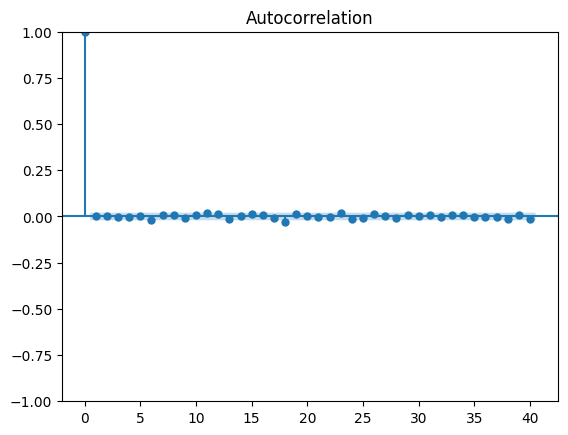

In [122]:
import statsmodels.tsa.api as smt #timeseries analysis

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)#auto_correlation value, lags= previous value
acf.show()

Assumption 2- Normality of Residuals 2) The second assumption is the Normality of Residuals / Error terms.

For this we prefer the Jarque Bera test. For a good model, the residuals should be normally distributed. The higher the value of Jarque Bera test , the lesser the residuals are normally distributed. We generally prefer a lower value of jarque bera test.

The Jarque–Bera test is a goodness-of-fit test of whether sample data have the skewness and kurtosis matching a normal distribution. A large value for the jarque-bera test indicates non normality.

The jarque bera test tests whether the sample data has the skewness and kurtosis matching a normal distribution. Note that this test generally works good for large enough number of data samples(>2000) as the test statistics asymptotically has a chi squared distribution with degrees 2 of freedom.

In [123]:
#H0: the error terms are normally distributed
#dof for residuals is n-2

In [124]:
from scipy import stats
print(stats.jarque_bera(lin_reg.resid))

SignificanceResult(statistic=65051.545241382584, pvalue=0.0)


The critical chi square value at the 5% level of significance is 5.99. If the computed value exceeds this value the null hypothesis is rejected. In this case the computed value of the JB statistic 65051.11 is greater than 5.99. Thus we reject the null hypothesis that the error terms are normally distributed.

<ipython-input-125-4a6e8f97f4aa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lin_reg.resid)


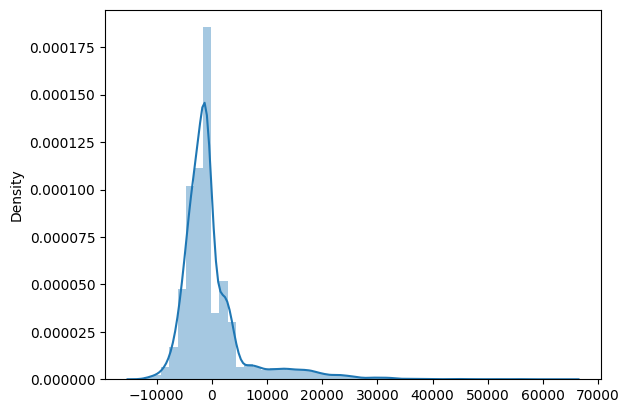

In [125]:
import seaborn as sns

sns.distplot(lin_reg.resid)
plt.show()

From the graph we infer that due to the high value of Jarque Bera test, only few residuals are normally distributed



**Asssumption 3 - Linearity of residuals**

Here we have 2 options. Either we can plot the observed values Vs predicted values and plot the Residual Vs predicted values and see the linearity of residuals. OR We can go for rainbow test. Let's look both of them one by one.

In [126]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=lin_reg, frac=0.5)#the fraction of the data to include in the center model

(1.0164972729968935, 0.2907128743692436)

H0:The data is linear, pvalue > 0.05 failed to reject H0, here we failed to reject H0 so residuals are normally distributed



In [127]:
lin_reg.resid.mean()

1.6646951309339807e-09

Assumption 4 - Homoscedasticity_test(using goldfeld test) OR (Beusch-Wagon Test) Homoscedacity :: If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

Heteroscedacity :: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

This test is based on the hytpothesis testing where null and alternate hypothesis are: 𝐻0:𝜎𝑢𝑖 𝑖𝑠 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎 𝐻𝑎:𝜎𝑢𝑖 𝑖𝑠 𝑛𝑜𝑡 𝑐𝑜𝑛𝑠𝑡𝑎𝑛𝑡 𝑎𝑐𝑟𝑜𝑠𝑠 𝑡ℎ𝑒 𝑟𝑎𝑛𝑔𝑒 𝑜𝑓 𝑑𝑎𝑡𝑎 The residuals should be homoscedastic.

**Goldfeld Test**


In [128]:
import statsmodels.stats.api as sms

In [129]:
name=['F-statistic','p-value']
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

test

(1.2289680194898223, 2.21674036994537e-12, 'increasing')

p-value below a certain level (like 0.05) indicates we should reject the null in favor of heteroscedasticity.



**Assumption 5- NO MULTI COLLINEARITY**

The interpretation of VIF is as follows: the square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. If no features are correlated, then all values for VIF will be 1.

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,vif
Income,3.183923
Monthly Premium Auto,27.569851
Months Since Last Claim,1.009934
Months Since Policy Inception,1.022048
Total Claim Amount,4.396905
Number of Open Complaints,1.009196
Number of Policies,1.019460
State_California,1.878492
State_Nevada,1.378696
State_Oregon,1.813907


we can see that there is high VIF in column Policy & policy type Also we have seen in statistical approach these veriables are not significant to predict target hence from above 2 conclusion we can remove them

In [131]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=dfn['CLV']
y =np.log(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [132]:
numerical_cols.rename(columns={'CLV':'CLV'},inplace=True)


In [133]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6393, 42)
(6393,)
(2741, 42)
(2741,)


# ***Model Building***

**Linear Regression**

In [134]:
from sklearn.linear_model import LinearRegression

In [135]:
lr = LinearRegression()
model = lr.fit(X_train,y_train)
print(f'R^2 score for train: {lr.score(X_train, y_train)}')
print(f'R^2 score for test: {lr.score(X_test, y_test)}')

R^2 score for train: 0.26073373730563176
R^2 score for test: 0.25484160264997935


In [136]:
y_pred = model.predict(X_test)

In [137]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [138]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.577231415348726
MAE 0.4455033282270873
R-squared: 0.25484160264997935


In [139]:
#Feature Selection by Recursive Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    Xc = sm.add_constant(X)
    model = sm.OLS(y,Xc).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['Monthly Premium Auto', 'Number of Open Complaints', 'Number of Policies', 'Coverage_Extended', 'Coverage_Premium', 'Education_High School or Below', 'EmploymentStatus_Employed', 'Marital Status_Single', 'Policy_Corporate L2', 'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3', 'Renew Offer Type_Offer4', 'Vehicle Class_SUV', 'Vehicle Class_Sports Car']


In [140]:
X_new = X[['Monthly Premium Auto', 'Number of Open Complaints', 'Number of Policies', 'Coverage_Extended', 'Coverage_Premium', 'Education_High School or Below', 'EmploymentStatus_Employed', 'Marital Status_Single', 'Policy_Corporate L2', 'Renew Offer Type_Offer2', 'Renew Offer Type_Offer3', 'Renew Offer Type_Offer4', 'Vehicle Class_SUV', 'Vehicle Class_Sports Car']]

In [141]:
X_constant_new=sm.add_constant(X_new)
lin_reg=sm.OLS(y,X_constant_new).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CLV   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     228.2
Date:                Tue, 12 Mar 2024   Prob (F-statistic):               0.00
Time:                        03:41:15   Log-Likelihood:                -7694.3
No. Observations:                9134   AIC:                         1.542e+04
Df Residuals:                    9119   BIC:                         1.553e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              7.9001      0.024    333.289      0.000       7.854       7.947
Monthly Premium Auto               0.0070      0.000     30.864      0.000       0.007       0.007
Number of Open Complaints         -0.0317      0.006     -4.895      0.000      -0.044      -0.019
Number of Policies                 0.0529      0.002     21.385      0.000       0.048       0.058
Coverage_Extended                  0.0669      0.014      4.773      0.000       0.039       0.094
Coverage_Premium                   0.0898      0.024      3.729      0.000       0.043       0.137
Education_High School or Below     0.0336      0.013      2.567      0.010       0.008       0.059
EmploymentStatus_Employed          0.0922      0.013      7.093      0.000       0.067       0.118
Marital Status_Single             -0.0506      0.014     -3.622      0.000      -0.078      -0.023
Policy_Corporate L2               -0.0548      0.024     -2.295      0.022      -0.102      -0.008
Renew Offer Type_Offer2           -0.1199      0.014     -8.370      0.000      -0.148      -0.092
Renew Offer Type_Offer3           -0.0602      0.018     -3.416      0.001      -0.095      -0.026
Renew Offer Type_Offer4           -0.1327      0.020     -6.541      0.000      -0.172      -0.093
Vehicle Class_SUV                  0.1502      0.017      8.777      0.000       0.117       0.184
Vehicle Class_Sports Car           0.1510      0.028      5.429      0.000       0.096       0.205
==============================================================================
Omnibus:                     1476.101   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2293.969
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                       3.788   Cond. No.                         516.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# ***Rigde and Lasso Regression***

In [142]:
from sklearn.linear_model import Ridge, Lasso

In [145]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

lasso = Lasso(random_state=1)
lasso.fit(X_train,y_train)
print('Ridge Regression')
y_pred = lasso.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared:',r2_score(y_test,y_pred))


Ridge Regression
RMSE: 0.5992937645386806
R-squared: 0.19679167777854611


# ***Decision Tree***

In [146]:
from sklearn.tree import DecisionTreeRegressor

In [147]:
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.2636910150910177
MAE 0.10343505564943467
R-squared: 0.8444967945595979


In [148]:
from sklearn.model_selection import train_test_split
X=dfn.drop(['CLV','Policy Type_Personal Auto','Policy Type_Special Auto','Policy_Personal L1','Policy_Personal L2','Policy_Personal L3',
'Policy_Special L1','Policy_Special L2','Policy_Special L3'],axis=1)
y=np.log(dfn['CLV'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

# ***RandomForest***

In [149]:
from sklearn.ensemble import RandomForestRegressor

In [150]:
rf = RandomForestRegressor(random_state=1)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.19593340661166422
MAE 0.08872719728948177
R-squared: 0.914144986571963


# ***Hyperparameter tuning of random forest***


In [162]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
params = {
        'max_depth' : [10,20,30],

        'n_estimators' : [100,200,50],

        "bootstrap" : [True, False],

        'max_features': ['auto', 'sqrt', 'log2']

        }

grid = GridSearchCV(estimator = rf, param_grid=params, cv = 5, n_jobs = -1, return_train_score = True )
grid.fit(X,y)
grid.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 200}

In [163]:
rf = RandomForestRegressor(**grid.best_params_)

rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RMSE: 0.19531507039608895
MAE 0.08869847301911567
R-squared: 0.9146860223995662


In [170]:
from sklearn.ensemble import AdaBoostRegressor

In [173]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate RandomForestRegressor as the base estimator
base_estimator = RandomForestRegressor(max_depth=5)

# Instantiate AdaBoostRegressor with RandomForestRegressor as base estimator
adaboost = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=150)

# Fit the model
adaboost.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=5),
                  n_estimators=150)

In [174]:
y_pred = adaboost.predict(X_test)
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print("MAE",mean_absolute_error(y_test,y_pred))
print('R-squared:',r2_score(y_test,y_pred))

RMSE: 0.21753796213517765
MAE 0.1301287767919719
R-squared: 0.8941675638563301


In [178]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate RandomForestRegressor with criterion='squared_error'
rf = RandomForestRegressor(criterion='squared_error', n_estimators=150)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Access feature importances and create a DataFrame
importance_df = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Score'])

# Sort the DataFrame by 'Score' column in descending order and select the top 10 features
top_10_features = importance_df.sort_values("Score", ascending=False).head(10)

# Display the top 10 features
print(top_10_features)




                                  Score
Number of Policies             0.672052
Monthly Premium Auto           0.231901
Total Claim Amount             0.014516
Income                         0.013188
Months Since Policy Inception  0.012524
Months Since Last Claim        0.012323
Number of Open Complaints      0.003347
Coverage_Extended              0.003001
EmploymentStatus_Employed      0.002776
Gender_M                       0.001918


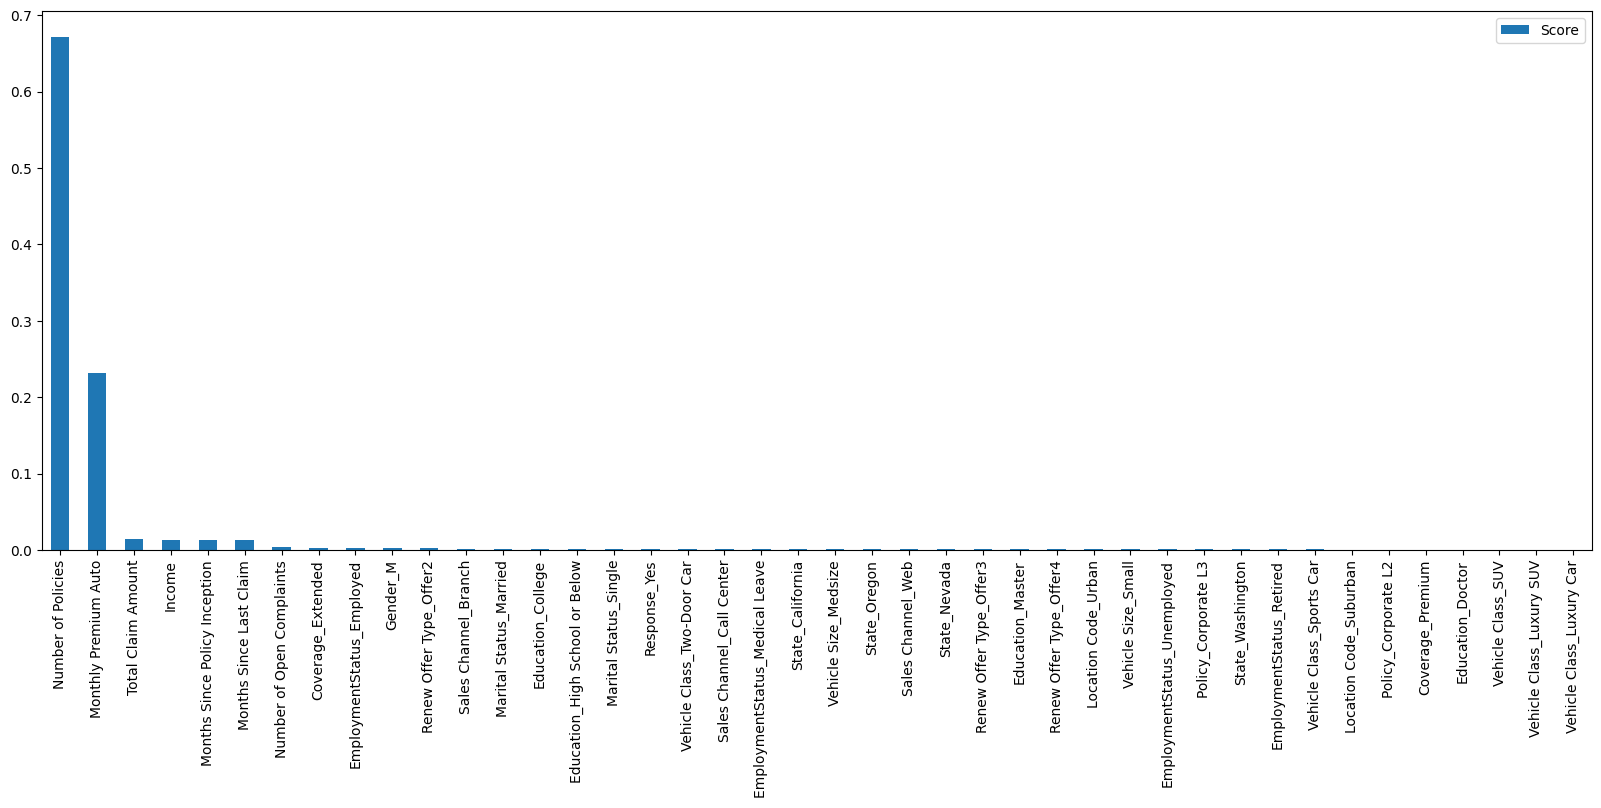

In [179]:
pd.DataFrame(rf.feature_importances_,index=X.columns,columns=['Score']).sort_values("Score",ascending=False).plot(kind='bar',figsize=(20,7))
plt.show()

Random Forest Model with hyperparameter tuning using GridSearchCV gave the best RMSE and R^2 score

No of Policies and Monthly Premium are the most important features in predicting CLV

# ***Conclusion***

1. Overall we can see that No of policies, Monthly Premium auto, Total Claim amount, Months Since Policy Inception, Income , Months Since Last Claim, Number of Open Complaints, Coverage_Extended,vEmploymentStatus_Employed and Renew Offer Type_Offer2 are the important features in predicting the Customer Lifetime Value.


2. The customers having more number of policies with high monthly premium will add more value to company.


3. Ironically being an auto insurance company, the type of vehicle or size does not have an impact on the CLV prediction.


4. The insurance agents should start increasing their policy advertisement for the customers who have more no. of policies, which is the major feature in predicting the CLV.


